![intro](assets/intro.jpg)

# Sommaire

1. [Nettoyage et description des donn√©es sources](#nettoyage)
2. [Correction des donn√©es de consommation mensuelles de l'effet temp√©rature](#q1)
3. [D√©saisonnalisation par moyennes mobiles](#q2)
4. [Pr√©vision de la consommation](#q3)
    1. [M√©thode de Holt Winters](#q3-1)     
    2. [M√©thode SARIMA](#q3-2)
    3. [Pr√©vision des consommations pour l'ann√©e 2020](#pred_fin)

<div id="nettoyage" style="float:left; padding:5px; background: black; width:100%; border-bottom: 2px solid #e3a51a;"><img src="assets/logo_small.png" style="float:left; margin-right:10px; height:40px"/><h1 style="float:left; margin-top:10px; color:white; font-family:Helvetica; font-variant: small-caps;">Nettoyage et description des donn√©es sources</h1></div>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

## <font color="#e3a51a" style="font-family:Helvetica; font-variant: small-caps;">Donn√©es mensuelles de consommation totale d'√©lectricit√© en √©nergie</font>

Ces donn√©es ont √©t√© t√©l√©charg√©es sur la page https://www.rte-france.com/eco2mix/telecharger-les-indicateurs.     
Nous aurons besoin, dans ce jeu de donn√©es, de la consommation totale en energie.

In [2]:
df_conso = pd.read_csv("datas/eCO2mix_RTE_energie_M.csv", encoding="latin_1", header=0, sep=";", parse_dates=[0], index_col="Mois")
df_conso.head()

Qualit√© Territoire  Production totale  \
Mois                                                            
2012-01-01  Donn√©es d√©finitives     France              57177   
2012-02-01  Donn√©es d√©finitives     France              54419   
2012-03-01  Donn√©es d√©finitives     France              48583   
2012-04-01  Donn√©es d√©finitives     France              44192   
2012-05-01  Donn√©es d√©finitives     France              40433   

            Production nucl√©aire  Production thermique totale  \
Mois                                                            
2012-01-01               42811.0                         5399   
2012-02-01               38661.0                         8721   
2012-03-01               37549.0                         5276   
2012-04-01               33100.0                         3484   
2012-05-01               29058.0                         1772   

            Production thermique charbon  Production thermique fioul  \
Mois                                                                   
2012-01-01                         741.0                         691   
2012-02-01                        2511.0                        1309   
2012-03-01                        1435.0                         666   
2012-04-01                        1655.0                         486   
2012-05-01                         854.0                         368   

            Production thermique gaz  Production hydraulique  \
Mois                                                           
2012-01-01                      3967                    6741   
2012-02-01                      4901                    5244   
2012-03-01                      3175                    3894   
2012-04-01                      1343                    5302   
2012-05-01                       549                    7706   

            Production √©olien  ...  Production bio√©nergies  \
Mois                           ...                           
2012-01-01               1587  ...                     514   
2012-02-01               1123  ...                     454   
2012-03-01                977  ...                     531   
2012-04-01               1572  ...                     405   
2012-05-01                974  ...                     469   

            Consommation totale  Solde exportateur  Echanges export  \
Mois                                                                  
2012-01-01                51086             5371.0           7043.0   
2012-02-01                54476             -715.0           4504.0   
2012-03-01                43156             4888.0           7042.0   
2012-04-01                40176             3447.0           5762.0   
2012-05-01                35257             4425.0           6391.0   

            Echanges import  Echanges avec le Royaume-Uni  \
Mois                                                        
2012-01-01           1672.0                         929.0   
2012-02-01           5220.0                        -798.0   
2012-03-01           2153.0                         583.0   
2012-04-01           2314.0                         547.0   
2012-05-01           1965.0                         693.0   

            Echanges avec l'Espagne  Echanges avec l'Italie  \
Mois                                                          
2012-01-01                    724.0                  1581.0   
2012-02-01                   -309.0                  1244.0   
2012-03-01                    330.0                  1742.0   
2012-04-01                     -9.0                  1271.0   
2012-05-01                    251.0                  1341.0   

            Echanges avec la Suisse  Echanges avec l'Allemagne et la Belgique  
Mois                                                                           
2012-01-01                   2195.0                                     -59.0  
2012-02-01                   1579.0                                   -2430.0  
2012-03-01           

In [3]:
df_conso.columns

Index(['Qualit√©', 'Territoire', 'Production totale', 'Production nucl√©aire',
       'Production thermique totale', 'Production thermique charbon',
       'Production thermique fioul', 'Production thermique gaz',
       'Production hydraulique', 'Production √©olien', 'Production solaire',
       'Production bio√©nergies', 'Consommation totale', 'Solde exportateur',
       'Echanges export', 'Echanges import', 'Echanges avec le Royaume-Uni',
       'Echanges avec l'Espagne', 'Echanges avec l'Italie',
       'Echanges avec la Suisse', 'Echanges avec l'Allemagne et la Belgique'],
      dtype='object')

In [4]:
df_conso = df_conso[["Territoire","Qualit√©","Consommation totale"]]
df_conso.head()

Territoire              Qualit√©  Consommation totale
Mois                                                           
2012-01-01     France  Donn√©es d√©finitives                51086
2012-02-01     France  Donn√©es d√©finitives                54476
2012-03-01     France  Donn√©es d√©finitives                43156
2012-04-01     France  Donn√©es d√©finitives                40176
2012-05-01     France  Donn√©es d√©finitives                35257

In [5]:
df_conso.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1221 entries, 2012-01-01 to 2020-09-01
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Territoire           1221 non-null   object
 1   Qualit√©              1221 non-null   object
 2   Consommation totale  1221 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 38.2+ KB


Ce jeu de donn√©es ne semble pas contenir de *null*, cependant des agglom√©rats semblent √™tre pr√©sents *(France)*.

In [6]:
df_conso.describe(include = "all")

Territoire              Qualit√©  Consommation totale
count        1221                 1221          1221.000000
unique         13                    2                  NaN
top        France  Donn√©es d√©finitives                  NaN
freq          105                  948                  NaN
mean          NaN                  NaN          6006.176085
std           NaN                  NaN         10678.691936
min           NaN                  NaN             0.000000
25%           NaN                  NaN          1789.000000
50%           NaN                  NaN          2938.000000
75%           NaN                  NaN          4508.000000
max           NaN                  NaN         57406.000000

In [7]:
df_conso["Territoire"].unique()

array(['France', 'Grand-Est', 'Nouvelle-Aquitaine',
       'Auvergne-Rh√¥ne-Alpes', 'Bourgogne-Franche-Comt√©', 'Bretagne',
       'Centre-Val de Loire', 'Ile-de-France', 'Occitanie', 'Normandie',
       'Hauts-de-France', 'PACA', 'Pays-de-la-Loire'], dtype=object)

Nous remarquons dans cette liste des r√©gions repr√©sent√©es que **la Corse est absente**. Si ces donn√©es sont pr√©sentes dans les autres jeux de donn√©es utilis√©s, nous les calculerons donc.

In [8]:
df_conso_france = df_conso[df_conso["Territoire"]=="France"]
df_conso_regions = df_conso[df_conso["Territoire"]!="France"]

In [9]:
df_conso_france.head()

Territoire              Qualit√©  Consommation totale
Mois                                                           
2012-01-01     France  Donn√©es d√©finitives                51086
2012-02-01     France  Donn√©es d√©finitives                54476
2012-03-01     France  Donn√©es d√©finitives                43156
2012-04-01     France  Donn√©es d√©finitives                40176
2012-05-01     France  Donn√©es d√©finitives                35257

In [10]:
df_conso_regions.head()

Territoire              Qualit√©  Consommation totale
Mois                                                                         
2013-01-01                Grand-Est  Donn√©es d√©finitives                    0
2013-01-01       Nouvelle-Aquitaine  Donn√©es d√©finitives                    0
2013-01-01     Auvergne-Rh√¥ne-Alpes  Donn√©es d√©finitives                    0
2013-01-01  Bourgogne-Franche-Comt√©  Donn√©es d√©finitives                    0
2013-01-01                 Bretagne  Donn√©es d√©finitives                    0

In [11]:
#Verification des consommations √† 0
df_conso_regions[df_conso_regions["Consommation totale"]==0].groupby(by="Mois").nunique()

Territoire  Qualit√©  Consommation totale
Mois                                                
2013-01-01          12        1                    1
2013-02-01          12        1                    1
2013-03-01          12        1                    1
2013-04-01          12        1                    1
2013-05-01          12        1                    1
2013-06-01          12        1                    1
2013-07-01          12        1                    1
2013-08-01          12        1                    1
2013-09-01          12        1                    1
2013-10-01          12        1                    1
2013-11-01          12        1                    1
2013-12-01          12        1                    1

Les donn√©es pour 2012 et 2013 au niveau r√©gionnal sont donc absentes.

In [12]:
df_conso_regions = df_conso_regions[df_conso_regions.index.map(pd.to_datetime)>pd.to_datetime('2013-12-01')]
df_conso_regions.head()

Territoire              Qualit√©  Consommation totale
Mois                                                                         
2014-01-01                Grand-Est  Donn√©es d√©finitives                 4594
2014-01-01       Nouvelle-Aquitaine  Donn√©es d√©finitives                 4501
2014-01-01     Auvergne-Rh√¥ne-Alpes  Donn√©es d√©finitives                 6693
2014-01-01  Bourgogne-Franche-Comt√©  Donn√©es d√©finitives                 2158
2014-01-01                 Bretagne  Donn√©es d√©finitives                 2390

In [13]:
df_conso_regions.describe(include="all")

Territoire              Qualit√©  Consommation totale
count                972                  972           972.000000
unique                12                    2                  NaN
top     Pays-de-la-Loire  Donn√©es d√©finitives                  NaN
freq                  81                  720                  NaN
mean                 NaN                  NaN          3258.083333
std                  NaN                  NaN          1501.364035
min                  NaN                  NaN          1170.000000
25%                  NaN                  NaN          1973.250000
50%                  NaN                  NaN          2970.500000
75%                  NaN                  NaN          4220.500000
max                  NaN                  NaN          8894.000000

On remarque √† pr√©sent que les donn√©es sembles coh√©rentes. Nous allons v√©rifier s'il y a encore des donn√©es manquantes puis les afficher visuellement pour v√©rifier.     
Pour information, **les consommations sont exprim√©es en TWh**.

In [14]:
df_conso_regions.groupby(by=["Territoire"]).count()

Qualit√©  Consommation totale
Territoire                                           
Auvergne-Rh√¥ne-Alpes          81                   81
Bourgogne-Franche-Comt√©       81                   81
Bretagne                      81                   81
Centre-Val de Loire           81                   81
Grand-Est                     81                   81
Hauts-de-France               81                   81
Ile-de-France                 81                   81
Normandie                     81                   81
Nouvelle-Aquitaine            81                   81
Occitanie                     81                   81
PACA                          81                   81
Pays-de-la-Loire              81                   81

Nous constatons donc que nous avons le m√™me nombre de donn√©es pour chaque r√©gion.    
**Affichons √† pr√©sent la projection en lineplot** :

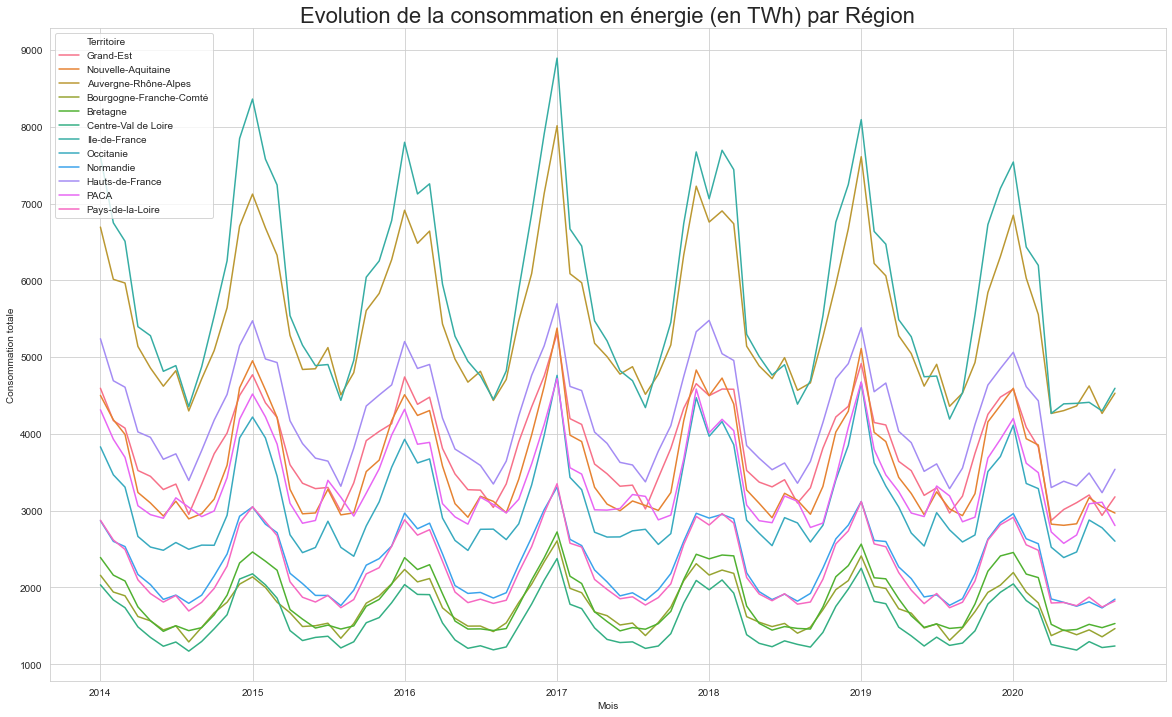

In [15]:
fig = plt.figure(figsize=(20,12))
sns.lineplot(data=df_conso_regions, x=df_conso_regions.index,  y="Consommation totale", hue="Territoire")
plt.title("Evolution de la consommation en √©nergie (en TWh) par R√©gion", fontsize=22)
plt.show()

Comme nous pouvions nous y attendre, **nous visualisons l'effet saisonnier sur la consommation totale**. Les courbes des diff√©rentes r√©gions de France suivent cependant la meme tendance qui semble √™tre pl√ªtot lin√©aire.

**Nous allons √©galement ploter les donn√©es "France"** :

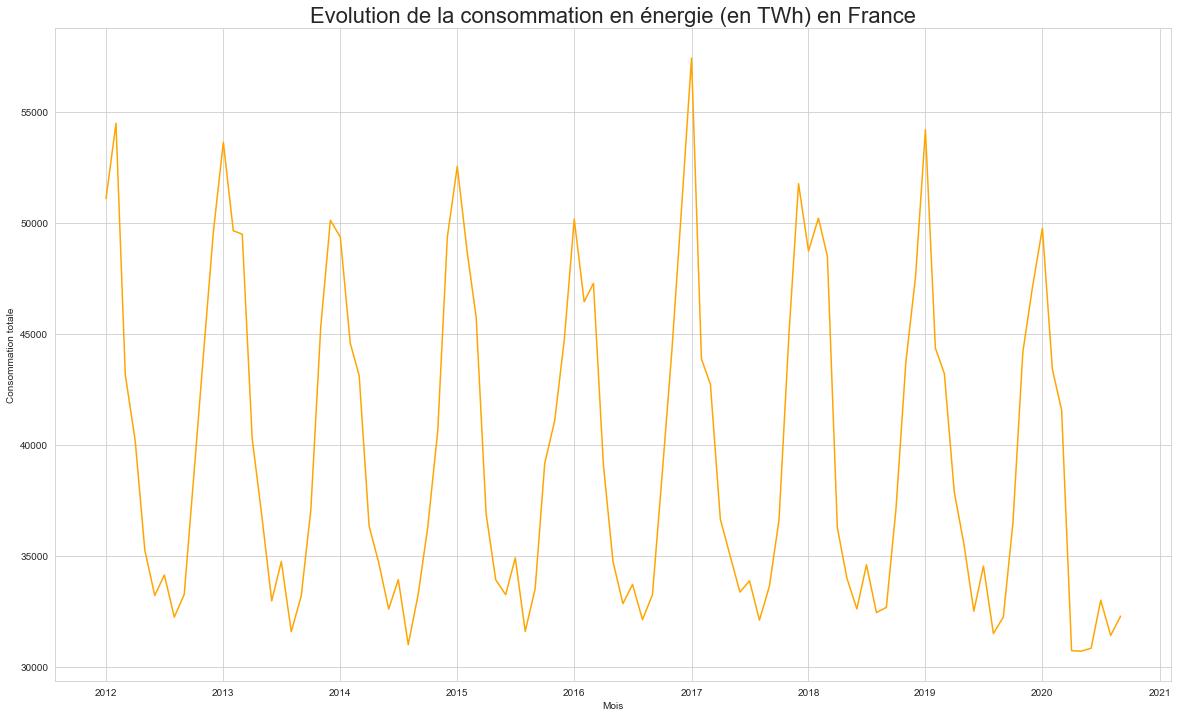

In [16]:
fig = plt.figure(figsize=(20,12))
sns.lineplot(data=df_conso_france, x=df_conso_france.index,  y="Consommation totale", color="orange")
plt.title("Evolution de la consommation en √©nergie (en TWh) en France", fontsize=22)
plt.show()

## <font color="#e3a51a" style="font-family:Helvetica; font-variant: small-caps;">Donn√©es m√©t√©o utilis√©es pour corriger les donn√©es de l'effet temp√©rature</font>

Ces datasets ont √©t√© t√©l√©charg√©s sur le lien https://cegibat.grdf.fr/simulateur/calcul-dju pour les donn√©es des stations de chaque chef lieu de R√©gion.

In [17]:
list_dju_file = os.listdir('datas/DJU')
print(list_dju_file)

['calcul_DJU_Auvergne-Rh√¥ne-Alpes.xlsx', 'calcul_DJU_Bourgogne-Franche-Comt√©.xlsx', 'calcul_DJU_Bretagne.xlsx', 'calcul_DJU_Centre-Val de Loire.xlsx', 'calcul_DJU_Grand-Est.xlsx', 'calcul_DJU_Hauts-de-France.xlsx', 'calcul_DJU_Ile-de-France.xlsx', 'calcul_DJU_Normandie.xlsx', 'calcul_DJU_Nouvelle-Aquitaine.xlsx', 'calcul_DJU_Occitanie.xlsx', 'calcul_DJU_PACA.xlsx', 'calcul_DJU_Pays-de-la-Loire.xlsx']


In [18]:
#Cr√©ation d'un dataframe global avec les DJU de chaque chef lieu de R√©gion
df_dju_full = pd.DataFrame(columns=["Annee","1","2","3","4","5","6","7","8","9","10","11","12","Region"])
for file in list_dju_file:
    file_path = "datas\DJU\\"+file
    region = file[11:-5]
    df_dju_test = pd.read_excel(file_path, skiprows=10, header=1, converters={'Unnamed: 0':str})
    df_dju_test = df_dju_test.rename(columns={"Unnamed: 0":"Annee", "JAN":"1", "F√âV":"2", "MAR":"3", "AVR":"4", "MAI":"5", "JUN":"6", "JUI":"7", "AO√õ":"8", "SEP":"9", "OCT":"10", "NOV":"11", "D√âC":"12"})
    df_dju_test = df_dju_test.iloc[:,0:-1]
    df_dju_test["Region"] = region
    df_dju_full = pd.concat([df_dju_full,df_dju_test], ignore_index=True)

In [19]:
df_dju_full

Annee      1      2      3      4      5     6     7     8     9     10  \
0   2019  445.9  308.7  237.6  170.4  106.6  15.3   0.0   1.6  14.7   83.8   
1   2018  301.4  430.4  291.8   97.8   47.2   0.3   0.0   1.5  13.3  122.8   
2   2017  532.2  271.1  205.4  180.8   80.7   3.7   1.3   2.0  49.1  110.0   
3   2016  344.0  319.4  318.4  176.8   93.7   8.3   4.4   0.3  14.5  191.2   
4   2015  419.5  393.2  276.1  143.4   49.1   0.0   0.0   0.0  50.2  188.6   
..   ...    ...    ...    ...    ...    ...   ...   ...   ...   ...    ...   
91  2016  317.1  301.1  309.5  239.9  109.4  36.9  13.8   5.2  16.9  183.8   
92  2015  357.2  350.6  275.1  145.4  119.9  23.3  11.1  11.8  74.3  167.8   
93  2014  300.1  268.0  257.5  169.8  127.5  23.9   5.1  32.0  14.5   81.9   
94  2013  377.5  358.8  334.4  236.0  174.0  54.4   3.2   1.0  37.5   91.1   
95  2012  334.4  423.7  224.0  247.0  106.1  49.7  31.6   6.5  62.7  142.8   

       11     12                Region  
0   284.6  327.4  Auvergne-Rh√¥ne-Alpes  
1   264.9  355.7  Auvergne-Rh√¥ne-Alpes  
2   328.5  409.8  Auvergne-Rh√¥ne-Alpes  
3   283.1  466.4  Auvergne-Rh√¥ne-Alpes  
4   249.5  289.7  Auvergne-Rh√¥ne-Alpes  
..    ...    ...                   ...  
91  263.7  355.0      Pays-de-la-Loire  
92  163.6  240.4      Pays-de-la-Loire  
93  194.4  337.7      Pays-de-la-Loire  
94  275.1  339.7      Pays-de-la-Loire  
95  267.4  303.8      Pays-de-la-Loire  

[96 rows x 14 columns]

In [20]:
df_dju_full = df_dju_full.melt(id_vars = ["Annee","Region"], value_vars=["1","2","3","4","5","6","7","8","9","10","11","12"]).rename(
             columns={"variable":"Mois", "value":"dju"})
df_dju_full = df_dju_full.sort_values(["Annee","Mois"])
df_dju_full["Jour"] = "1"
df_dju_full["Periode"] = df_dju_full[["Annee", "Mois", "Jour"]].apply(lambda x: "-".join(x), axis=1)
df_dju_full["Periode"] = df_dju_full["Periode"].apply(pd.to_datetime, format='%Y-%m-%d')
df_dju_full = df_dju_full[["Region","Periode","dju"]].sort_values("Periode")
df_dju_full

Region    Periode    dju
7     Auvergne-Rh√¥ne-Alpes 2012-01-01  409.0
95        Pays-de-la-Loire 2012-01-01  334.4
87                    PACA 2012-01-01  327.4
79               Occitanie 2012-01-01  348.6
63               Normandie 2012-01-01  383.8
...                    ...        ...    ...
1112             Normandie 2019-12-01  369.5
1120    Nouvelle-Aquitaine 2019-12-01  223.9
1128             Occitanie 2019-12-01  264.6
1144      Pays-de-la-Loire 2019-12-01  302.0
1096       Hauts-de-France 2019-12-01  350.8

[1152 rows x 3 columns]

In [21]:
#Regroupement par la moyenne pour obtenir les donn√©es au niveau National
df_dju_full_france = df_dju_full.groupby(by="Periode").mean()
df_dju_full_france

dju
Periode               
2012-01-01  366.325000
2012-02-01  471.958333
2012-03-01  235.766667
2012-04-01  231.400000
2012-05-01   91.775000
...                ...
2019-08-01    5.333333
2019-09-01   33.858333
2019-10-01  111.591667
2019-11-01  288.550000
2019-12-01  321.025000

[96 rows x 1 columns]

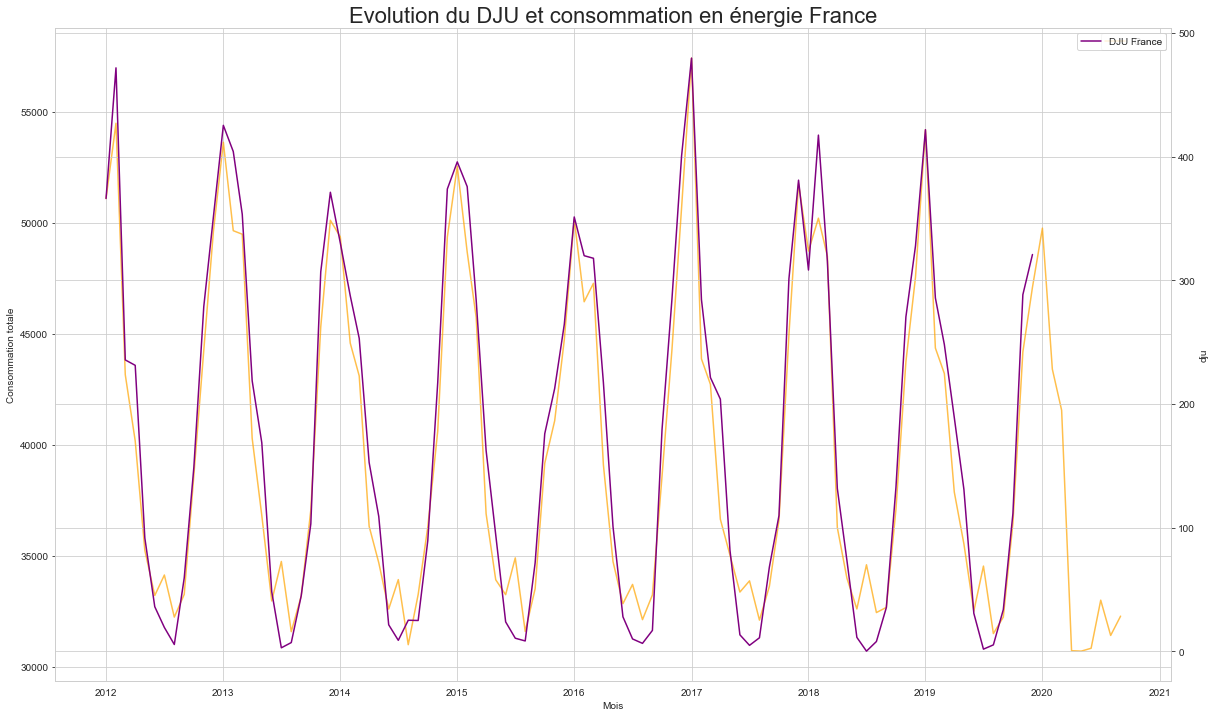

In [22]:
fig = plt.figure(figsize=(20,12))
ax1 = sns.lineplot(data=df_conso_france, x=df_conso_france.index,  y="Consommation totale", color="orange", alpha=0.7, legend='brief', label="Conso")
ax2 = plt.twinx()
ax2 = sns.lineplot(data=df_dju_full_france, x=df_dju_full_france.index,  y="dju", color="purple", ax=ax2, legend='brief', label="DJU France")
plt.title("Evolution du DJU et consommation en √©nergie France", fontsize=22)
plt.show()

Les 2 courbes semblent suivre la m√™me saisonnalit√© ce qui indique bien que **les variations de la courbe de consommation d'√©nergie sont effectivement globalement li√©es aux √©carts de temp√©ratures**.

<div id="q1" style="float:left; padding:5px; background: black; width:100%; border-bottom: 2px solid #e3a51a;"><img src="assets/logo_small.png" style="float:left; margin-right:10px; height:40px"/><h1 style="float:left; margin-top:10px; color:white; font-family:Helvetica; font-variant: small-caps;">Correction des donn√©es de l'effet temp√©rature</h1></div>

Pour r√©pondre aux questions et traiter les timeseries, **nous allons travailler sur les donn√©es France**. Nous cr√©ons donc un dataframe global pour analyse.

In [23]:
datas = pd.merge(df_dju_full_france, df_conso_france.reset_index().rename(columns={"Mois":"Periode"}), on="Periode", how="left").set_index("Periode")
datas = datas.rename(columns = {"Consommation totale":"Conso"})
datas

dju Territoire              Qualit√©  Conso
Periode                                                      
2012-01-01  366.325000     France  Donn√©es d√©finitives  51086
2012-02-01  471.958333     France  Donn√©es d√©finitives  54476
2012-03-01  235.766667     France  Donn√©es d√©finitives  43156
2012-04-01  231.400000     France  Donn√©es d√©finitives  40176
2012-05-01   91.775000     France  Donn√©es d√©finitives  35257
...                ...        ...                  ...    ...
2019-08-01    5.333333     France  Donn√©es consolid√©es  31505
2019-09-01   33.858333     France  Donn√©es consolid√©es  32248
2019-10-01  111.591667     France  Donn√©es consolid√©es  36482
2019-11-01  288.550000     France  Donn√©es consolid√©es  44180
2019-12-01  321.025000     France  Donn√©es consolid√©es  47096

[96 rows x 4 columns]

In [24]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2012-01-01 to 2019-12-01
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dju         96 non-null     float64
 1   Territoire  96 non-null     object 
 2   Qualit√©     96 non-null     object 
 3   Conso       96 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 3.8+ KB


In [25]:
datas.describe()

dju         Conso
count   96.000000     96.000000
mean   179.478646  40030.791667
std    143.171890   7093.466001
min      0.258333  31004.000000
25%     33.102083  33696.750000
50%    165.666667  37082.500000
75%    302.785417  45417.250000
max    479.825000  57406.000000

Pour corriger les donn√©es de consommation mensuelles de l'effet temp√©rature *(dues au chauffage √©lectrique)*, nous allons utiliser une r√©gression lin√©aire.
Regardons dans un premier temps le scatter plot correspondant √† :
- **$X$** = dju
- **$Y$** = consommation totale

Dans ce mod√®le, nous supposons qu'il existe une **relation lin√©aire entre la variable √† expliquer et la variable explicative** : 

<span style="font-size:18px">$$Y = a + bX + \varepsilon $$</span>

Nous cherchons donc les param√®tres inconnus $a$ et $b$ pour corriger les consommations mensuelles de l'effet de temp√©rature.

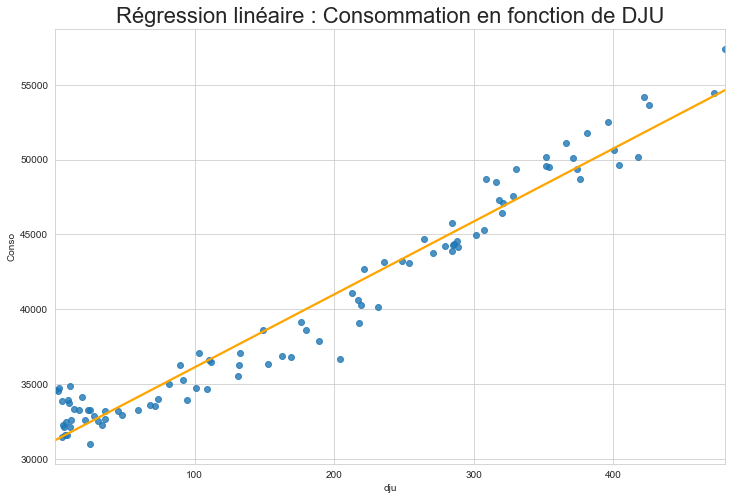

In [26]:
fig = plt.figure(figsize=(12,8))
ax = sns.regplot(data=datas, x="dju", y="Conso", robust=True, ci=None, line_kws={"color":"orange"})
plt.title("R√©gression lin√©aire : Consommation en fonction de DJU", fontsize=22)
plt.show()

R√©alisons √† pr√©sent la r√©gression lin√©aire simple gr√¢ce √† la **librairie Statsmodels** :

In [27]:
import statsmodels.formula.api as smf

In [28]:
reg_conso = smf.ols('Conso ~ dju', data=datas).fit()
print(reg_conso.summary())

                            OLS Regression Results                            
Dep. Variable:                  Conso   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1959.
Date:                Mon, 16 Nov 2020   Prob (F-statistic):           9.63e-65
Time:                        12:33:57   Log-Likelihood:                -838.93
No. Observations:                  96   AIC:                             1682.
Df Residuals:                      94   BIC:                             1687.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.134e+04    250.567    125.095      0.0

In [29]:
a, b = reg_conso.params
print("a =",a,"| b =",b)

a = 31344.50955260327 | b = 48.39730138219127


Ici, **le $R^2$ est de l'ordre de 0.95**, ce qui est relativement √©l√©v√© et au vu de la repr√©sentation graphique de notre droite de r√©gression, cela nous indique que le mod√®le est bon. 
La variable *"dju"* est √©galement statistiquement significative au niveau de test 5%, sa **P-value √©tant de 0**.

Les coeffiscients de regressions sont ici estim√©s :
- $a = 31344$
- $b = 48.39$

**Nous allons √©galement repr√©senter les valeurs ajust√©es en fonction des valeurs observ√©es** :

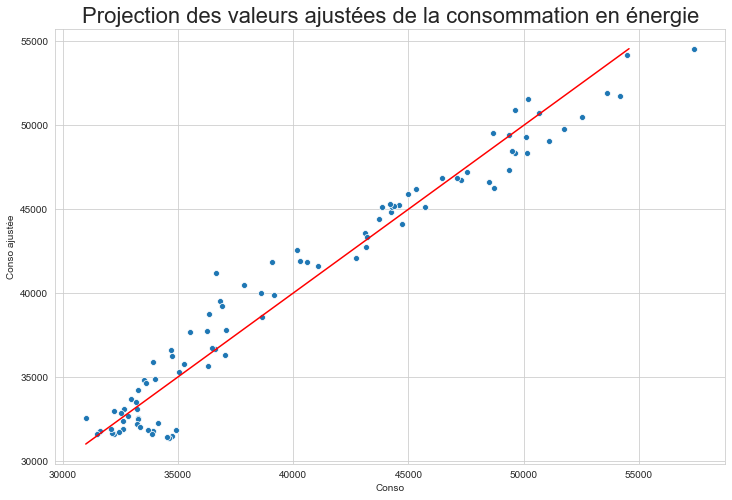

In [30]:
datas['Conso_ajuste'] = reg_conso.predict()

X_plot = [datas['Conso'].min(), datas['Conso_ajuste'].max()]

fig = plt.figure(figsize=(12,8))
ax = sns.scatterplot(x="Conso", y="Conso_ajuste", data=datas)
ax.set(xlabel='Conso', ylabel='Conso ajust√©e')
plt.plot(X_plot, X_plot, color='r')
plt.title("Projection des valeurs ajust√©es de la consommation en √©nergie", fontsize=22)
plt.show()

On remarque que les points projet√©s sont proches de la premi√®re bissectrice, ce qui nous indique que les valeurs ajust√©es sont proches des valeurs r√©√©lles. Notre mod√®le semble correct. 

Enfin, nous allons **repr√©senter les r√©sidus, $\varepsilon$ √©tant un param√®tre de notre mod√®le**. Nous allons v√©rifier qu'ils sont bien centr√©s et de variance constante.

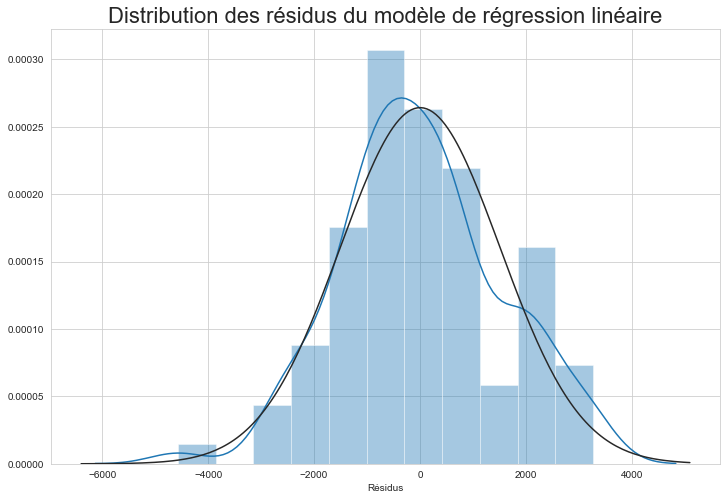

In [31]:
from scipy.stats import norm, shapiro

fig = plt.figure(figsize=(12,8))
ax = sns.distplot(reg_conso.resid, fit=norm)
plt.xlabel('R√©sidus')
plt.title("Distribution des r√©sidus du mod√®le de r√©gression lin√©aire", fontsize=22)
plt.show()

On remarque donc que la distribution des r√©sidus semble centr√©e et suivent une loi gaussienne. Nous allons r√©aliser un test de Shapiro-Wilk pour confirmer ce dernier point :

In [32]:
shapiro_test = shapiro(reg_conso.resid)
shapiro_test.pvalue

0.3269602954387665

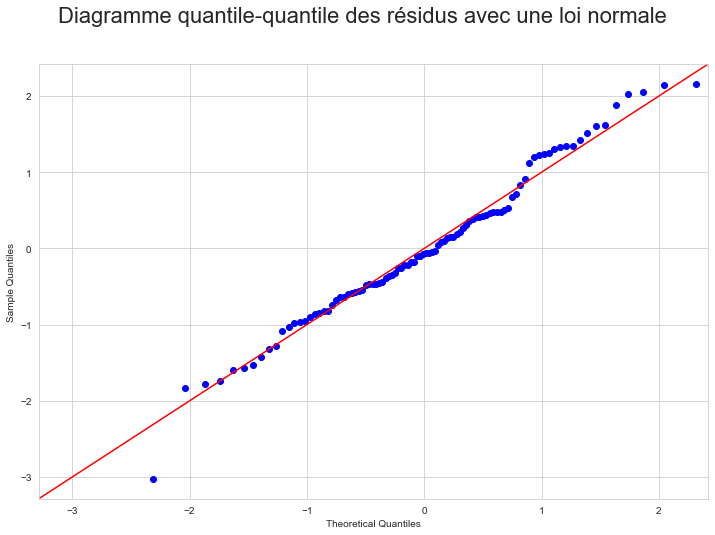

In [33]:
fig = sm.qqplot(reg_conso.resid, fit=True, line="45")
fig.set_size_inches(12, 8)
fig.suptitle("Diagramme quantile-quantile des r√©sidus avec une loi normale", fontsize=22)
plt.show()

La P-value est ici non significative au niveau de test 5%. **Les r√©sidus suivent donc une loi normale** comme nous le constatons √©galement sur le QQPlot.

Les tests sur notre mod√®les de r√©gression lin√©aire √©tant significatifs, nous allons pouvoir utiliser les coeffiscients obtenus pour corriger notre consommation d'√©nergie des effets de la temp√©rature :

$$Conso_{ajust√©e} = Conso -(dju * b)$$

In [34]:
datas['Conso_ajuste'] = datas['Conso'] - (datas['dju']*b)

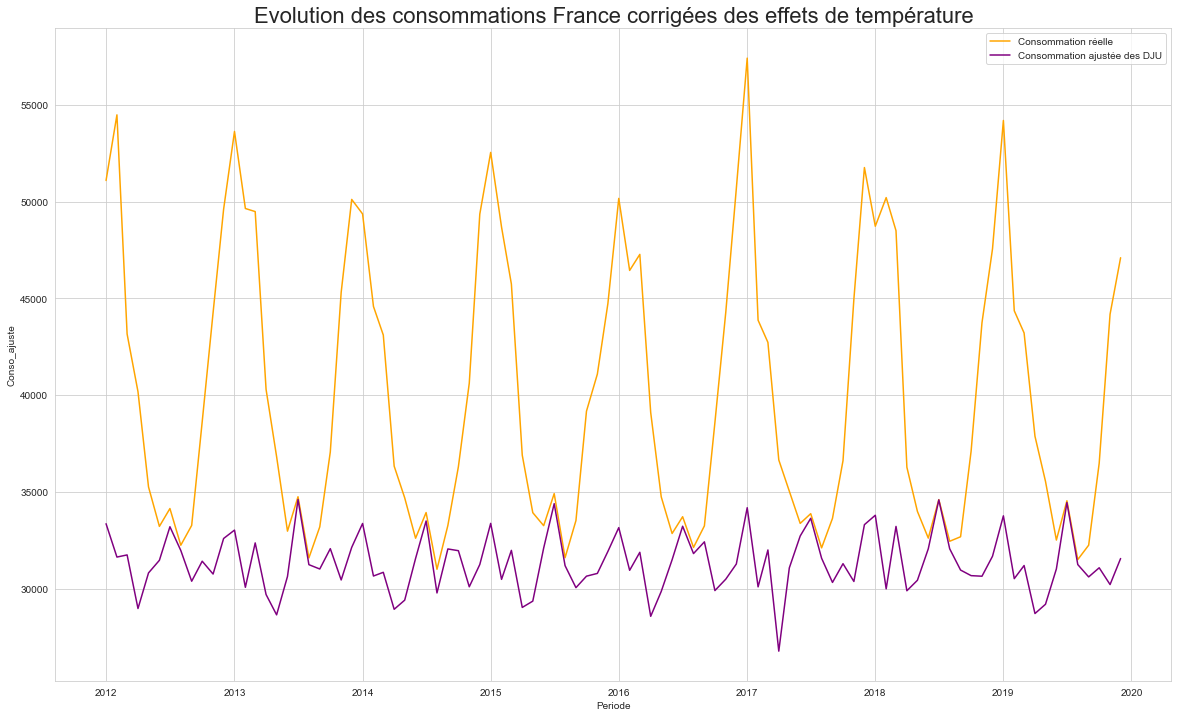

In [35]:
fig = plt.figure(figsize=(20,12))
ax1 = sns.lineplot(data=datas, x=datas.index,  y="Conso", color="orange", legend='brief', label="Consommation r√©elle")
ax2 = sns.lineplot(data=datas, x=datas.index,  y="Conso_ajuste", color="purple", legend='brief', label="Consommation ajust√©e des DJU")
plt.title("Evolution des consommations France corrig√©es des effets de temp√©rature", fontsize=22)
plt.show()

On voit ici clairement l'impact des temp√©ratures sur les consommation d'√©nergie au niveau national. Il existe encore sur cette s√©rie temporelle corrig√©e un fort impact saisonnier.

Nous allons donc effectuer une **d√©saisonnalisation de la consommation corrig√©e des effets de temp√©rature par la m√©thode des moyennes mobiles**.

<div id="q2" style="float:left; padding:5px; background: black; width:100%; border-bottom: 2px solid #e3a51a;"><img src="assets/logo_small.png" style="float:left; margin-right:10px; height:40px"/><h1 style="float:left; margin-top:10px; color:white; font-family:Helvetica; font-variant: small-caps;">D√©saisonnalisation par moyennes mobiles</h1></div>

Une moyenne mobile est une combinaison lin√©aire d'instants pass√©s et futurs de notre s√©rie temporelle. L'enjeu est de trouver une moyenne mobile qui laisse la **tendance invariante**, qui **absorbe la saisonnalit√©** et qui **r√©duit le r√©sidu** : 

Notre s√©rie temporelle : <span style="font-size:18px">$X_t = T_t + S_t + \varepsilon_t$</span>

Si on applique une moyenne mobile $ùëÄ$ sur la s√©rie, nous obtenons : <span style="font-size:18px">$MX_t = MT_t + MS_t + M\varepsilon_t$</span>

Ses propri√©t√©s id√©ales seront donc :
- $MT_t = T_t$
- $MS_t = 0$
- $M\varepsilon_t$ faible

Ici, nous allons utiliser la fonction **"seasonal_decompose" du package statsmodels** :

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

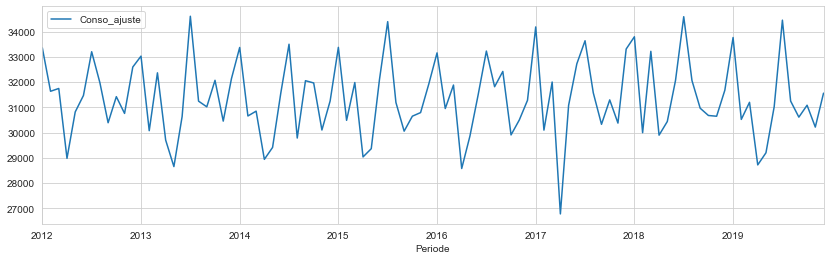

In [37]:
datas.plot(y="Conso_ajuste", figsize=(14,4))

Cette s√©rie temporelle semble √™tre un mod√®le additif. Nous allons donc travailler avec le **logarithme de la variable "Conso_ajuste"** :

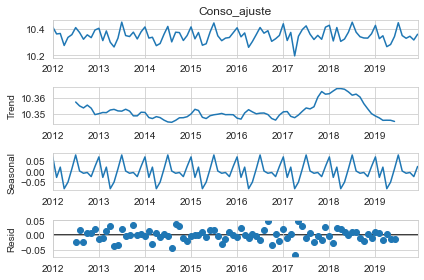

In [38]:
x = datas["Conso_ajuste"]
y = np.log(x)
decomp_y = seasonal_decompose(y,  model='additive')
decomp_y.plot()
plt.show()

On peut voir sur ce graphique combin√© la d√©composition de la tendance et de la saisonnalit√© ainsi que les r√©sidus.
Nous allons placer les valeurs de la d√©composition dans un dataframe Pandas :

In [39]:
df_decomp_y_seasonal = pd.DataFrame(decomp_y.seasonal)
y_compl = pd.merge(y, df_decomp_y_seasonal, on="Periode")
y_compl["cvs"] = np.exp(y_compl["Conso_ajuste"] - y_compl["seasonal"])
y_compl

Conso_ajuste  seasonal           cvs
Periode                                         
2012-01-01     10.415019  0.069027  31132.006781
2012-02-01     10.362003 -0.029015  32565.795695
2012-03-01     10.365507  0.020048  31115.424052
2012-04-01     10.274253 -0.083164  31489.737321
2012-05-01     10.335768 -0.051737  32451.578833
...                  ...       ...           ...
2019-08-01     10.349675  0.001511  31199.692567
2019-09-01     10.329061 -0.009322  30896.021802
2019-10-01     10.344360 -0.005621  31256.479821
2019-11-01     10.316092 -0.025219  30986.641945
2019-12-01     10.359622  0.023208  30835.256127

[96 rows x 3 columns]

Projetons √† pr√©sent les **donn√©es corrig√©es des variations saisonni√®res** ***(CVS)*** :

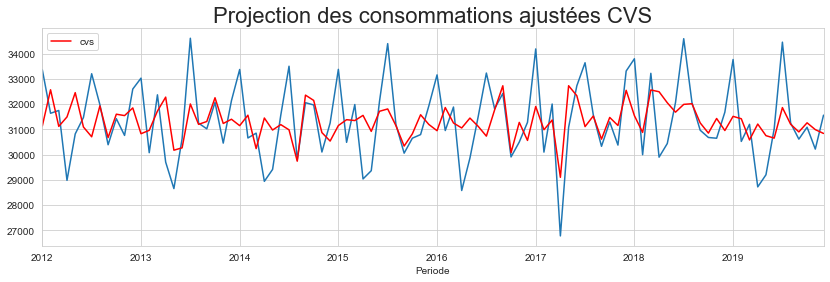

In [40]:
x.plot(figsize=(14,4))
#Plot des valeurs obtenues par CVS des moyennes mobiles
y_compl["cvs"].plot(legend = True, color="r")
plt.title("Projection des consommations ajust√©es CVS", fontsize=22)
plt.show()

Nous allons ajouter les valeurs de la **consommation ajust√©e des effets et la temp√©rature et corrig√©e des variations saisonni√®res** √† notre dataset initial afin de pouvoir les travailler ensuite.

In [41]:
datas["Conso_ajuste_cvs"] = y_compl["cvs"]
datas

dju Territoire              Qualit√©  Conso  Conso_ajuste  \
Periode                                                                       
2012-01-01  366.325000     France  Donn√©es d√©finitives  51086  33356.858571   
2012-02-01  471.958333     France  Donn√©es d√©finitives  54476  31634.490302   
2012-03-01  235.766667     France  Donn√©es d√©finitives  43156  31745.529577   
2012-04-01  231.400000     France  Donn√©es d√©finitives  40176  28976.864460   
2012-05-01   91.775000     France  Donn√©es d√©finitives  35257  30815.337666   
...                ...        ...                  ...    ...           ...   
2019-08-01    5.333333     France  Donn√©es consolid√©es  31505  31246.881059   
2019-09-01   33.858333     France  Donn√©es consolid√©es  32248  30609.348037   
2019-10-01  111.591667     France  Donn√©es consolid√©es  36482  31081.264477   
2019-11-01  288.550000     France  Donn√©es consolid√©es  44180  30214.958686   
2019-12-01  321.025000     France  Donn√©es consolid√©es  47096  31559.256324   

            Conso_ajuste_cvs  
Periode                       
2012-01-01      31132.006781  
2012-02-01      32565.795695  
2012-03-01      31115.424052  
2012-04-01      31489.737321  
2012-05-01      32451.578833  
...                      ...  
2019-08-01      31199.692567  
2019-09-01      30896.021802  
2019-10-01      31256.479821  
2019-11-01      30986.641945  
2019-12-01      30835.256127  

[96 rows x 6 columns]

In [42]:
datas.to_csv("datas/conso_ajustee.csv", index=True)

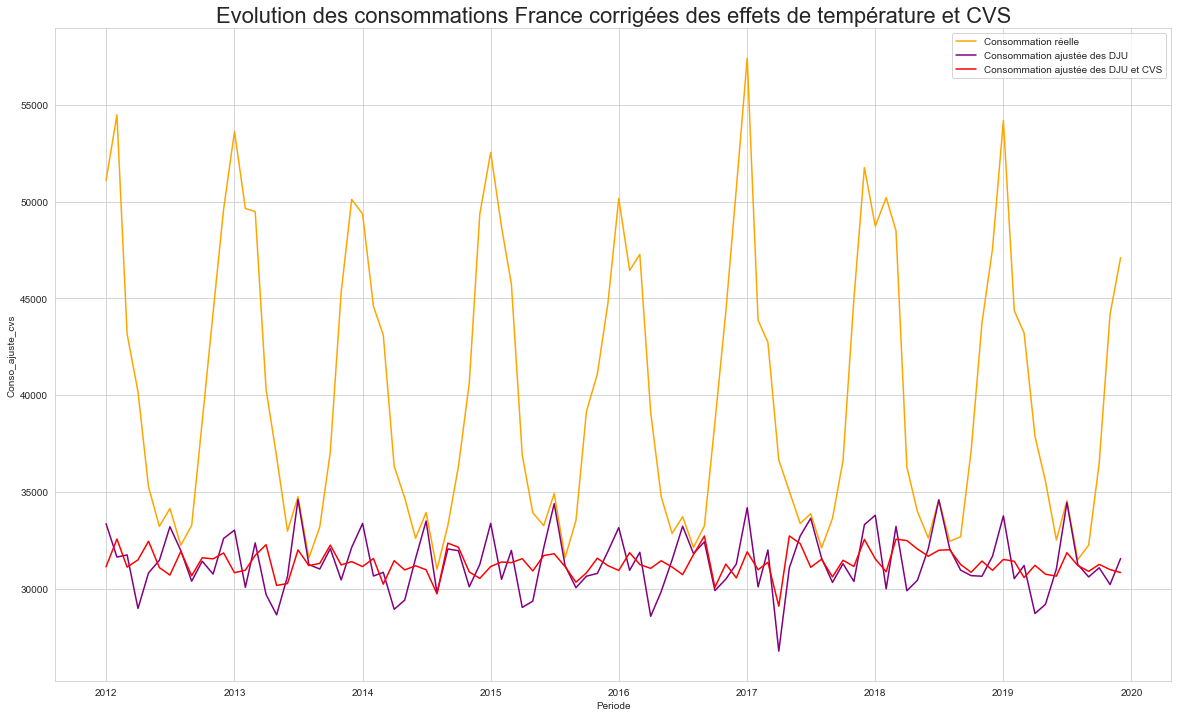

In [43]:
fig = plt.figure(figsize=(20,12))
ax1 = sns.lineplot(data=datas, x=datas.index,  y="Conso", color="orange", legend='brief', label="Consommation r√©elle")
#ax1.lines[0].set_linestyle("--")
ax2 = sns.lineplot(data=datas, x=datas.index,  y="Conso_ajuste", color="purple", legend='brief', label="Consommation ajust√©e des DJU")
ax3 = sns.lineplot(data=datas, x=datas.index,  y="Conso_ajuste_cvs", color="red", legend='brief', label="Consommation ajust√©e des DJU et CVS")
plt.title("Evolution des consommations France corrig√©es des effets de temp√©rature et CVS", fontsize=22)
plt.show()

<div id="q3" style="float:left; padding:5px; background: black; width:100%; border-bottom: 2px solid #e3a51a;"><img src="assets/logo_small.png" style="float:left; margin-right:10px; height:40px"/><h1 style="float:left; margin-top:10px; color:white; font-family:Helvetica; font-variant: small-caps;">Pr√©vision de la consommation</h1></div>

## <font color="#e3a51a" style="font-family:Helvetica; font-variant: small-caps;" id="q3-1">M√©thode de Holt-Winters (lissage exponentiel)</font>

La m√©thode de Holt-Winters est une m√©thode de lissage exponentiel, bas√© sur les instants pass√©s. Elle consiste √† supposer que  $ùëã_ùë°$ est approximable au voisinage de $ùëá$ par $ùëé_ùëá+(ùë°‚àíùëá)ùëè_ùëá+ùëÜ_ùëá$. En d√©signant par $ùë†$ la p√©riode du cycle saisonnier de la s√©rie temporelle.

**Pour cette pr√©vision, nous allons utiliser la s√©rie corrig√©e des effets de temp√©rature** :

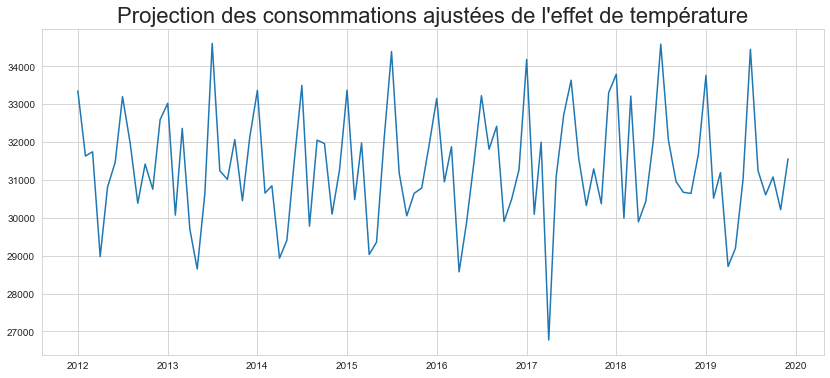

In [44]:
plt.figure(figsize=(14,6))
plt.plot(datas['Conso_ajuste'], label='Consommation ajust√©e des effets de temp√©rature')
plt.title("Projection des consommations ajust√©es de l'effet de temp√©rature", fontsize=22)
plt.show()

Nous allons travailler sur la s√©rie de 2012 √† 2018 afin de tenter de pr√©voir l'ann√©e 2019 pour comparer la pr√©vision au donn√©es r√©elles.    
Nous utiliserons la fonction ExponentialSmoothing de Statsmodels :

In [45]:
x_train = x["2012":"2018"]
x_test = x["2019"]
y_train = np.log(x_train)
y_test = np.log(x_test)

In [46]:
from statsmodels.tsa.api import ExponentialSmoothing
hw_ln = ExponentialSmoothing(np.asarray(y_train), seasonal_periods=12, trend='add', seasonal='add').fit()
hw_pred_ln = hw_ln.forecast(12)

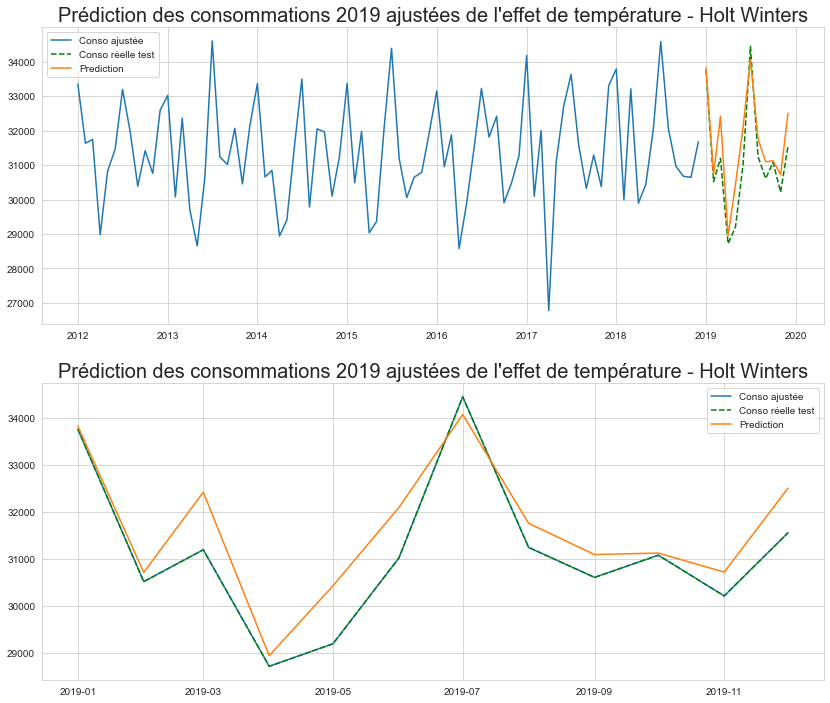

In [47]:
plt.figure(figsize=(14,12))
plt.subplot(211)
plt.plot(x_train, label='Conso ajust√©e')
plt.plot(x_test, label='Conso r√©elle test', color="g", linestyle="--")
plt.plot(y_test.index, np.exp(hw_pred_ln), label='Prediction')
plt.title("Pr√©diction des consommations 2019 ajust√©es de l'effet de temp√©rature - Holt Winters", fontsize=20)
plt.legend()

#Zoom
plt.subplot(212)
plt.plot(x["2019":], label='Conso ajust√©e')
plt.plot(x_test, label='Conso r√©elle test', color="g", linestyle="--")
plt.plot(y_test.index, np.exp(hw_pred_ln), label='Prediction')
plt.title("Pr√©diction des consommations 2019 ajust√©es de l'effet de temp√©rature - Holt Winters", fontsize=20)
plt.legend()

plt.show()

La pr√©diction pour 2019 avec **la m√©thode de Holt Winters est relativement fid√®le aux donn√©es r√©elles**. La saisonnalit√© et la tendance sont repr√©sentatives. Nous allons ensuite r√©aliser cette pr√©diction avec une m√©thode SARIMA.

**A pr√©sent, regardons les m√©triques principales du mod√®le** :

#### RMSE (Root Mean Square Error) :
Le crit√®re RMSE se caract√©rise par la moyenne des carr√©s des √©carts entre les donn√©es pr√©dites et les donn√©es r√©elles. C'est de fait une mesure globale de l'exactitude du mod√®le. Plus la valeur du RMSE est proche de 0, meilleur est le mod√®le en terme d'exactitude. 

#### MAPE (Mean Average Percentage Error)
Erreur relative absolue moyenne.

In [48]:
#Fonction de calculs des metriques importantes MAE, MSE, MAPE, RMSE, R¬≤
def metrics_timeseries(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    diff = y_true - y_pred
    mae = np.mean(abs(diff))
    mse = np.mean(diff**2)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs(diff / y_true)) * 100
    r2 = 1-(sum(diff**2)/sum((y_true-np.mean(y_true))**2))
    dict_metrics = {"M√©trique":["MAE", "MSE", "RMSE", "MAPE", "R¬≤"], "R√©sultats":[mae, mse, rmse, mape, r2]}
    df_metrics = pd.DataFrame(dict_metrics)
    return df_metrics

In [49]:
df_metrics_holt_winters = metrics_timeseries(np.exp(y_test), np.exp(hw_pred_ln))
df_metrics_holt_winters

M√©trique      R√©sultats
0      MAE     574.707289
1      MSE  506040.406414
2     RMSE     711.365171
3     MAPE       1.865724
4       R¬≤       0.792255

## <font color="#e3a51a" style="font-family:Helvetica; font-variant: small-caps;" id="q3-2">M√©thode SARIMA</font>

Les mod√®les SARIMA *(Seasonnal AutoRegressive Integrated Moving Average)* permettent de mod√©liser des s√©ries qui pr√©sentent une saisonnalit√©, comme c'est le cas pour notre dataset.

Dans un premier temps, nous allons **tester la stationnarit√© de notre s√©rie avec le test ADF** *(Augmented Dickey-Fuller)*.     
L'hypoth√®se nulle du test est que la s√©rie temporelle n'est pas stationnaire.

In [50]:
from statsmodels.tsa.stattools import adfuller, acf, pacf

In [51]:
#ADF-test(S√©rie originelle)
res_adf_o = adfuller(x,regression='ct')
print('p-value ADF s√©rie originelle :{}'.format(res_adf_o[1]))

p-value ADF s√©rie originelle :0.4084295754097529


In [52]:
#ADF-test(S√©rie diff√©renci√©e)
res_adf_d = adfuller(x.diff().dropna(),regression='c')
print('p-value ADF s√©rie diff√©renci√©e :{}'.format(res_adf_d[1]))

p-value ADF s√©rie diff√©renci√©e :2.2508365429056965e-08


**Au niveau de test 5%, on ne rejette pas l'hypoth√®se de non-stationnarit√© de la s√©rie**, contrairement √† la s√©rie diff√©renci√©e.     
Nous allons donc devoir effectuer une stationnarisation.

### <font color="purple" style="font-family:Helvetica; font-variant: small-caps;">Stationnarisation de la s√©rie</font>
Nous allons r√©aliser cette **stationnarisation par diff√©renciation** de mani√®re it√©rative si besoin. Nous allons travailler sur le logarithme de la s√©rie, comme pour la m√©thode de Holt-Winters.

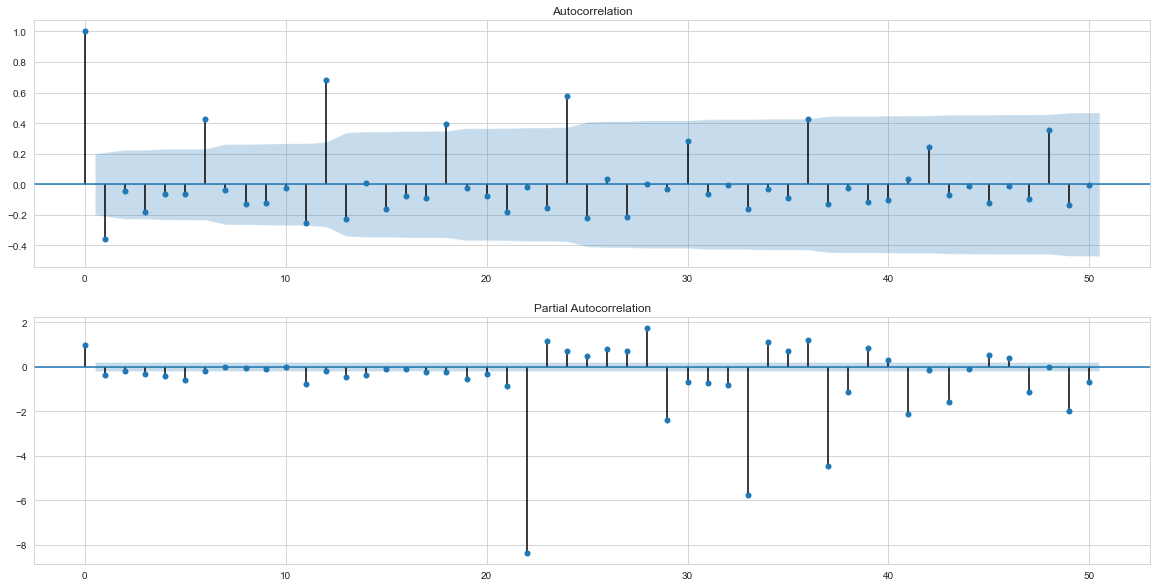

In [53]:
fig,ax = plt.subplots(2,1,figsize=(20,10))
fig = sm.graphics.tsa.plot_acf(y.diff().dropna(), lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(y.diff().dropna(), lags=50, ax=ax[1])
plt.show()

Comme on peut le voir, il y a des pics significatifs dans le graphique ACF au d√©calage 6, 12, 18 ... *(composante saisonni√®re semestrielle)*. Dans le graphique PACF, les d√©lais sont plus lents √† se d√©sint√©grer autour de 22, 32, ainsi que des pics n√©gatifs significatifs.     
Ces caract√©ristiques sugg√®rent un point de d√©part potentiel des param√®tres de $SARIMA(1,1,0)(1,1,1,6)$

- p et P sont tous deux √©gaux √† 1 (Pics positifs significatifs dans les graphiques ACF et PACF) 
- d et D sont tous deux √©gaux √† 1 (diff√©renciation a effectuer sur les premiers param√®tres et les saisonniers) 
- q = 0 et Q = 1 (pics n√©gatifs significatifs sur le PACF mais pas forcement sur ACF) 
- s √©gal √† 6 (composante saisonni√®re semestrielle)

Nous allons effectuer dans un premier temps une diff√©renciation $(ùêº‚àíùêµ^{6})$

In [54]:
y_diff_6 = y.diff(6)

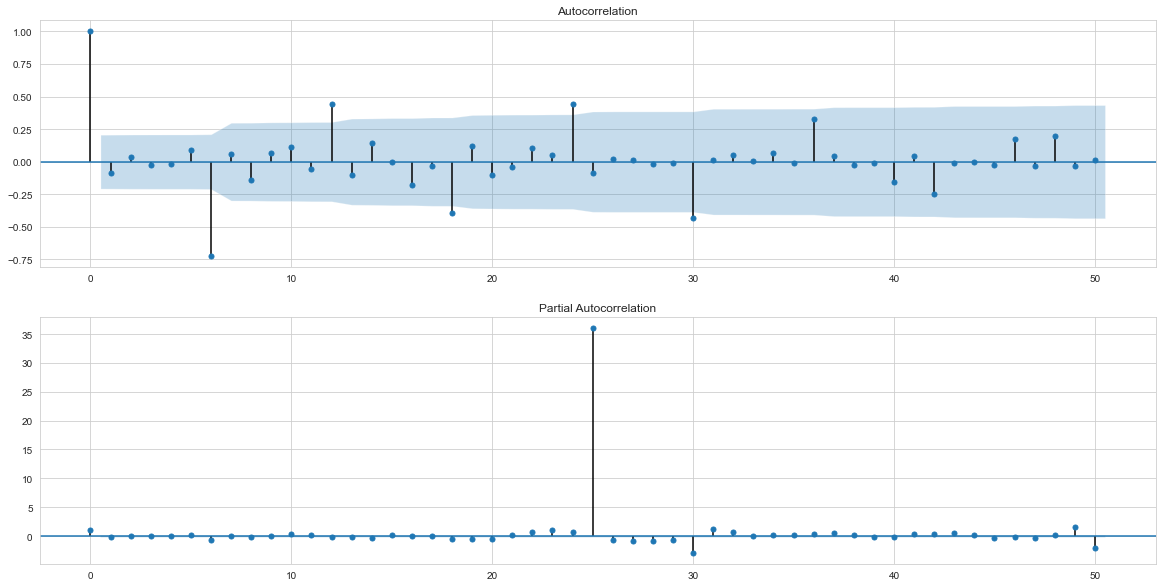

In [55]:
fig,ax = plt.subplots(2,1,figsize=(20,10))
fig = sm.graphics.tsa.plot_acf(y_diff_6.dropna(), lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(y_diff_6.dropna(), lags=50, ax=ax[1])
plt.show()

Il existe encore un probl√®me de stationarit√© pour les multiples de 12 selon les autocorr√©logrammes. Nous allons donc effectuer une seconde diff√©renciation $(ùêº‚àíùêµ^{12})$ sur cette s√©rie diff√©renci√©e.

In [56]:
y_diff_6_12 = y_diff_6.diff(12)

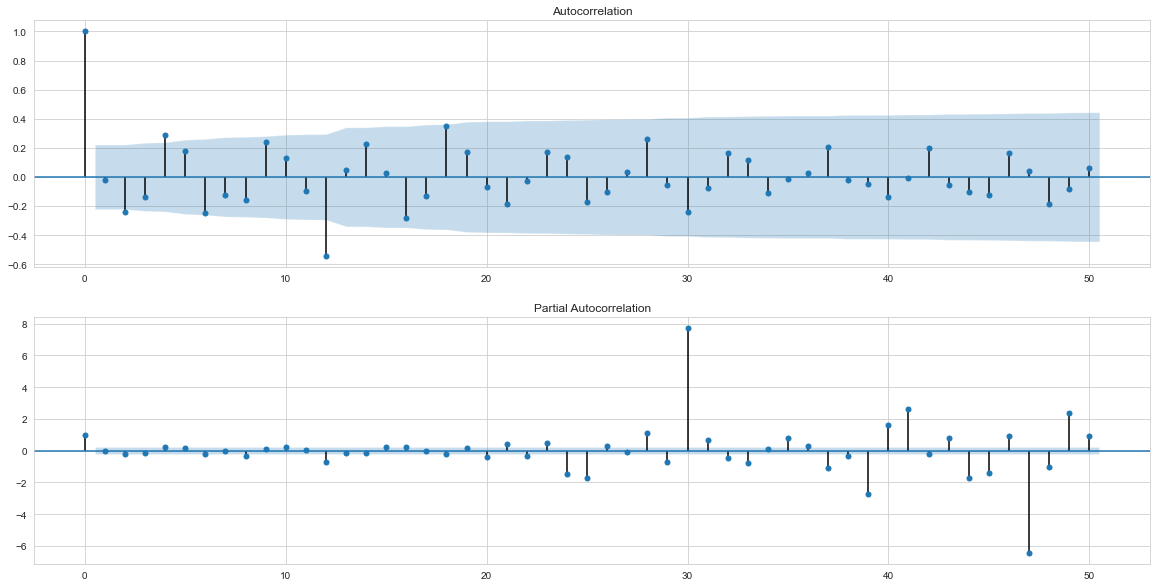

In [57]:
fig,ax = plt.subplots(2,1,figsize=(20,10))
fig = sm.graphics.tsa.plot_acf(y_diff_6_12.dropna(), lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(y_diff_6_12.dropna(), lags=50, ax=ax[1])
plt.show()

### <font color="purple" style="font-family:Helvetica; font-variant: small-caps;">Estimation et validation des mod√®les</font>

Comme demand√©, nous allons r√©aliser la mod√©lisation avec un mod√®le SARIMA :

In [58]:
from statsmodels.tsa.statespace.sarimax import *
from statsmodels.stats.diagnostic import acorr_ljungbox

model1 = SARIMAX(np.asarray(y), order=(1,1,0), seasonal_order=(1,1,1,6))
results1 = model1.fit()
residus1 = results1.resid
print(results1.summary())

print('\nTEST DE JUNG-BOX - (Test de blancheur)\n\nRetard : p-value')
for elt in np.arange(6,50,6):
    print('{} : {}'.format(elt, acorr_ljungbox(results1.resid, lags=elt)[1].mean()))

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 6)   Log Likelihood                 164.403
Date:                             Mon, 16 Nov 2020   AIC                           -320.806
Time:                                     12:34:29   BIC                           -310.851
Sample:                                          0   HQIC                          -316.793
                                              - 96                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5126      0.068     -7.513      0.000      -0.646      -0.379
ar.S.L6       -0.3196      

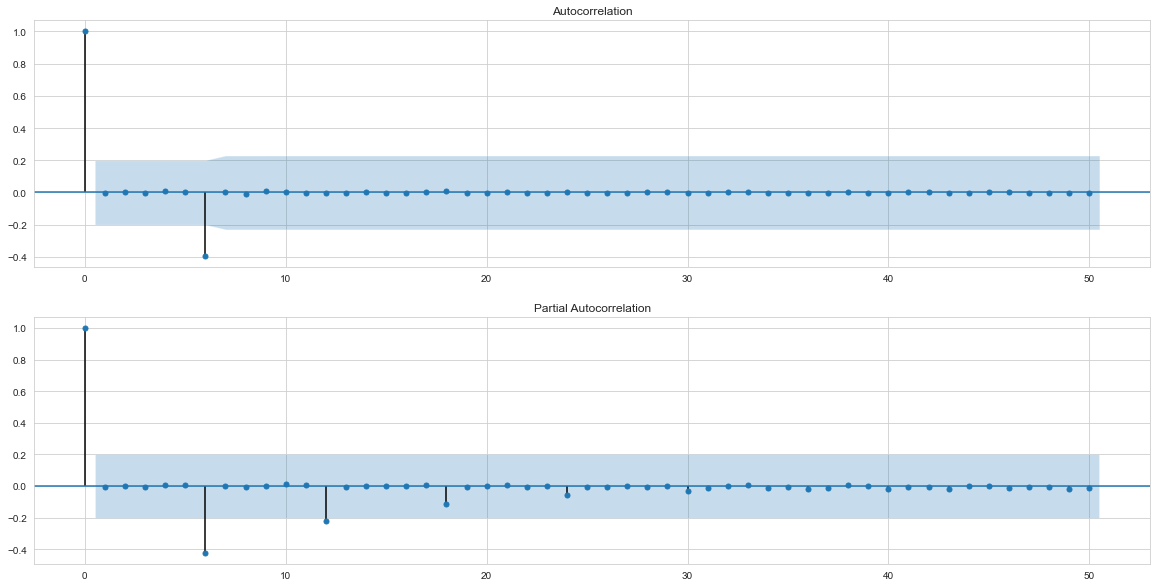

In [59]:
fig, ax = plt.subplots(2,1,figsize=(20,10))
fig = sm.graphics.tsa.plot_acf(residus1, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(residus1, lags=50, ax=ax[1])
plt.show()

**Les tests de significativit√© des param√®tres et de blancheur du r√©sidu sont valid√©s au niveau 5%**. De  plus, sur les graphiques ACF et PACF des r√©sidus, il n'y a pas de pics fortement significatifs mais il existe tout de m√™me des variations.

In [60]:
shapiro(residus1)

ShapiroResult(statistic=0.16124123334884644, pvalue=6.728095655430961e-21)

Le **test de normalit√© est √©galement valid√©** pour ce mod√®le.     
Nous allons √† pr√©sent √©diter les plots de diagnostique du mod√®le :

In [61]:
def plot_diagnostics(sarima_res, variable=0, lags=10, fig=None, figsize=None):
        return type(sarima_res.plot_diagnostics(variable, lags, fig, figsize))

matplotlib.figure.Figure

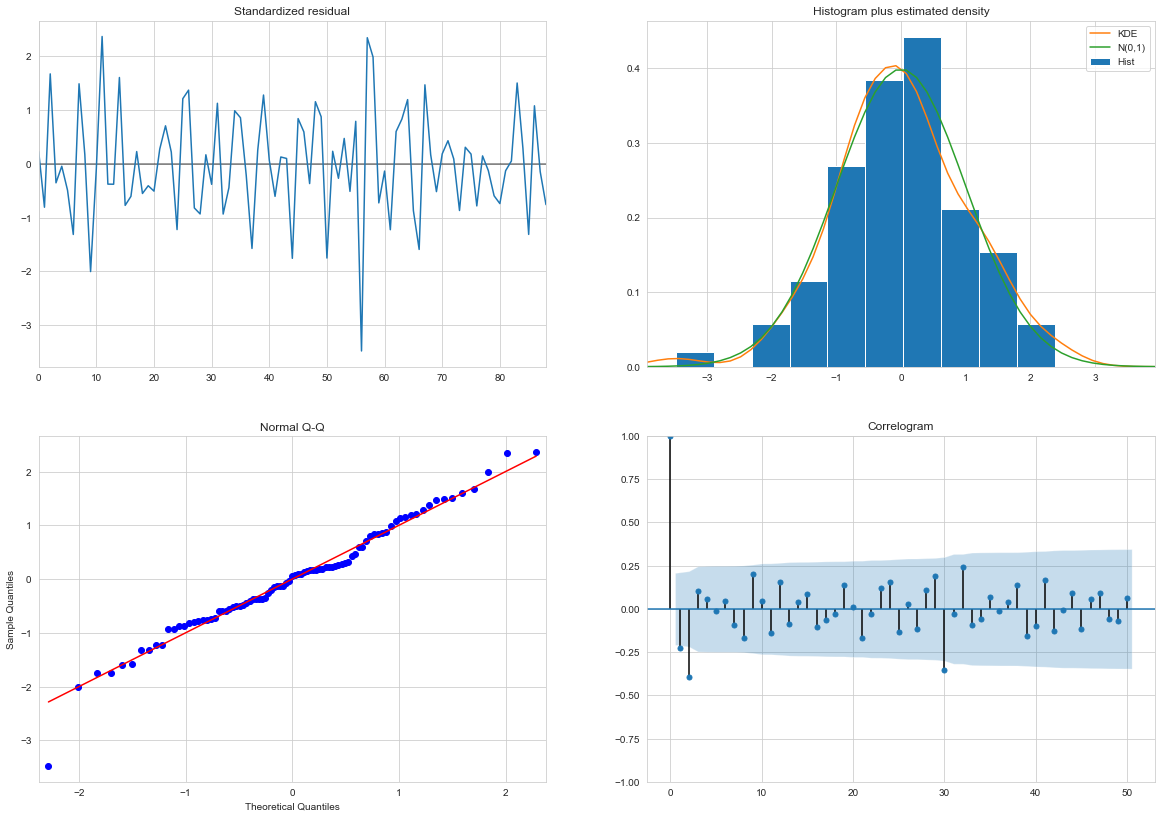

In [62]:
plot_diagnostics(sarima_res = results1, figsize=(20,14), lags=50)

On rermarque donc ici que les r√©sidus sont bien un bruit blanc et leur normalit√© est √©galement valid√©e. Le mod√®le semble donc performant, mais nous allons r√©aliser une **Grid Search** pour v√©rifier les autres param√®tres avant de **pouvoir effectuer nos tests √† posteriori**.

```python
df_results_gs = pd.DataFrame(columns=["Mod√®le","AIC","MAPE","RMSE","MSE","MAE"])

def grid_search_sarima(season, y_train, y_test):
# Define the p, d and q parameters to take any value between 0 and 2
    configs = list()
    # Liste des config
    p_params = [0, 1, 2]
    d_params = [0, 1]
    q_params = [0, 1, 2]
    P_params = [0, 1, 2]
    D_params = [0, 1]
    Q_params = [0, 1, 2]
    m_params = season

    for p in p_params:
        for d in d_params:
            for q in q_params:
                for P in P_params:
                    for D in D_params:
                        for Q in Q_params:
                            for m in m_params:
                                cfg = [(p,d,q), (P,D,Q,m)]
                                configs.append(cfg)

    list_model = list()
    list_aic = list()
    list_mape = list()
    list_rmse = list()
    list_mse = list()
    list_mae = list()

    for config_sarima in configs:
        order, seasonal_order = config_sarima
        try:
            model = sm.tsa.statespace.SARIMAX(y_train, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
            results = model.fit(disp=False)
            pred_model = results.get_forecast(12)
            pred = pred_model.predicted_mean
      
            #metriques
            y_true, y_pred = np.array(np.exp(y_test)), np.array(np.exp(pred))
            diff = y_true - y_pred
            mae = np.mean(abs(diff))
            mse = np.mean(diff**2)
            rmse = np.sqrt(mse)
            mape = np.mean(np.abs(diff / y_true)) * 100
            #print('SARIMA{}x{} - AIC:{} - MAPE:{}'.format(order, seasonal_order, results.aic, mape))

            str_model = str(order) + str(seasonal_order)
            list_model.append(str_model)
            list_aic.append(results.aic)
            list_mape.append(mape)
            list_rmse.append(rmse)
            list_mse.append(mse)
            list_mae.append(mae)

        except:
            continue

    df_results_gs["Mod√®le"] = list_model
    df_results_gs["AIC"] = list_aic
    df_results_gs["MAPE"] = list_mape
    df_results_gs["RMSE"] = list_rmse
    df_results_gs["MSE"] = list_mse
    df_results_gs["MAE"] = list_mae

    return df_results_gs

grid_search_sarima([6,12],y_train,y_test)
```

In [63]:
df_grid_search = pd.read_csv("datas/grid_search_sarima.csv").sort_values(by="AIC")
df_grid_search.head(10)

Mod√®le         AIC      MAPE         RMSE           MSE  \
13    (0, 0, 0)(1, 0, 1, 6) -301.511986  5.089872  2029.446401  4.118653e+06   
14   (0, 0, 0)(1, 0, 1, 12) -301.407048  5.276942  2090.174227  4.368828e+06   
211   (1, 0, 0)(1, 0, 1, 6) -301.032681  5.110580  2038.027806  4.153557e+06   
212  (1, 0, 0)(1, 0, 1, 12) -300.267310  5.294939  2098.259807  4.402694e+06   
26    (0, 0, 0)(2, 0, 2, 6) -298.834790  5.202683  2070.464604  4.286824e+06   
410  (2, 0, 0)(1, 0, 1, 12) -298.560774  5.334164  2107.345140  4.440904e+06   
224   (1, 0, 0)(2, 0, 2, 6) -298.227155  5.181111  2066.572004  4.270720e+06   
245  (1, 0, 1)(1, 0, 1, 12) -297.186752  5.379354  2122.615116  4.505495e+06   
422   (2, 0, 0)(2, 0, 2, 6) -296.674288  5.184953  2063.936267  4.259833e+06   
257   (1, 0, 1)(2, 0, 2, 6) -295.204714  5.229659  2073.964084  4.301327e+06   

             MAE  
13   1584.582025  
14   1643.523347  
211  1590.673210  
212  1648.913627  
26   1620.577209  
410  1660.159641  
224  1613.856567  
245  1673.192328  
422  1614.319825  
257  1626.548827

Toujours en fonction des premiers autocorr√©logrammes et des r√©sultats obtenus dans cette grid search, **Nous allons tester le mod√®les qui semble avoir les meilleures m√©triques et un AIC significatif :**
- (1, 0, 1)(1, 0, 1, 12)

In [64]:
model2 = SARIMAX(np.asarray(y), order=(1,0,1), seasonal_order=(1,0,1,12))
results2 = model2.fit()
residus2 = results2.resid
print(results2.summary())

print('\nTEST DE JUNG-BOX - (Test de blancheur)\n\nRetard : p-value')
for elt in np.arange(6,50,6):
    print('{} : {}'.format(elt, acorr_ljungbox(results2.resid, lags=elt)[1].mean()))

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   96
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                 198.169
Date:                            Mon, 16 Nov 2020   AIC                           -386.338
Time:                                    12:34:39   BIC                           -373.516
Sample:                                         0   HQIC                          -381.155
                                             - 96                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   8639.939      0.000       1.000       1.000
ma.L1         -0.9414      0.065   

Le **mod√®le 2 semble plus performant** en tous points, nous allons r√©aliser les tests sur ce dernier :

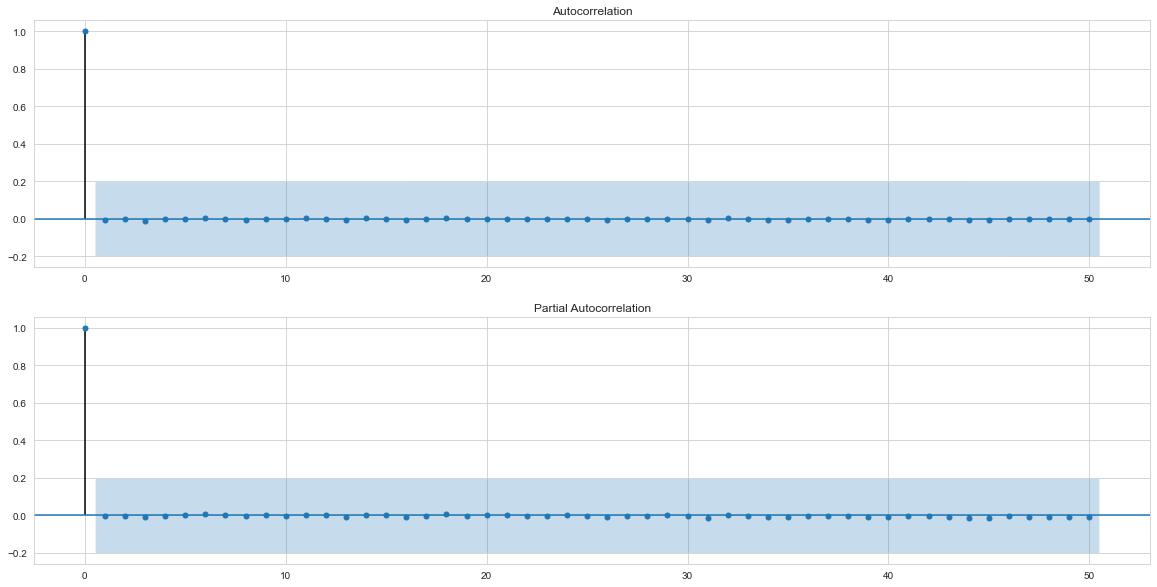

In [65]:
fig, ax = plt.subplots(2,1,figsize=(20,10))
fig = sm.graphics.tsa.plot_acf(residus2, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(residus2, lags=50, ax=ax[1])
plt.show()

matplotlib.figure.Figure

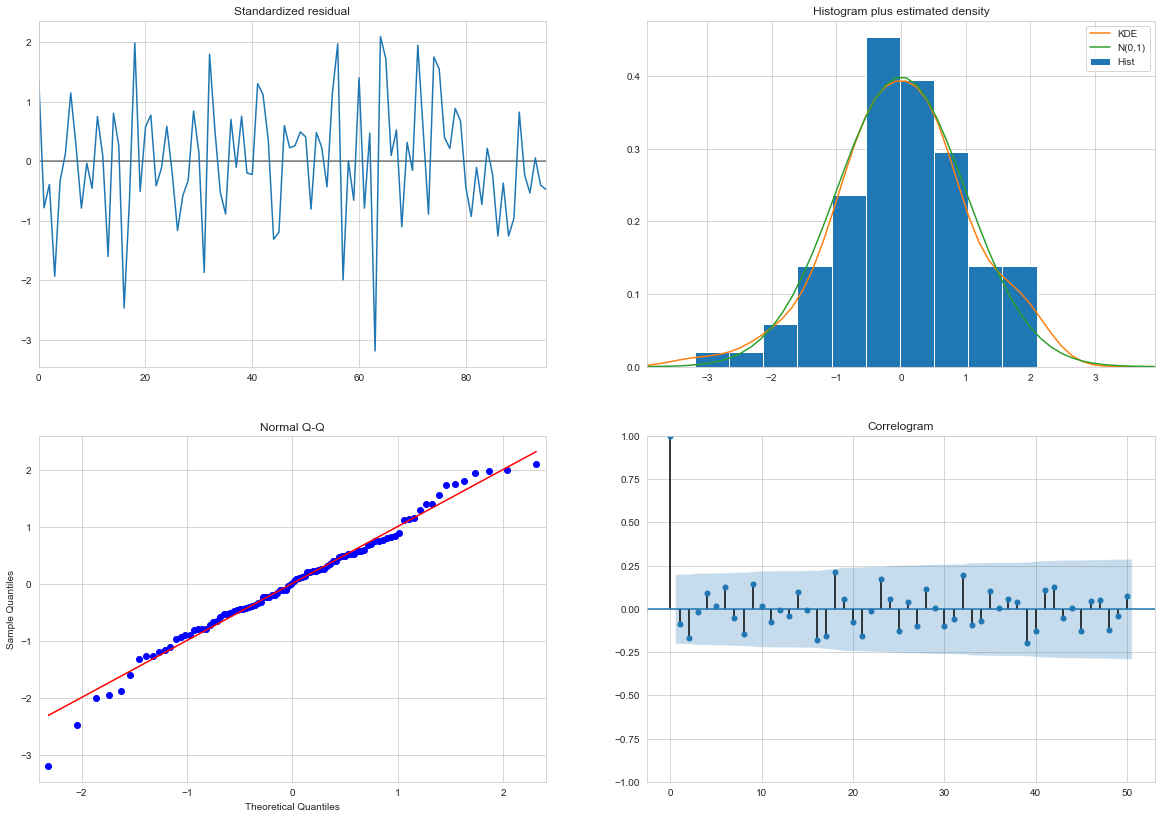

In [66]:
plot_diagnostics(sarima_res = results2, figsize=(20,14), lags=50)

On remarque **sur ce second mod√®le des indicateurs encore meilleurs que sur le mod√®le 1**. Le test de blancheur pr√©sente des p-values proches de 1 et les indicateurs de performance tels que l'AIC sont satisfaisant. La normalit√© des r√©sidus est √©galement confirm√©e.    
Nous utiliserons donc le mod√®le 2 pour nos analyses √† posteriori.

### <font color="purple" style="font-family:Helvetica; font-variant: small-caps;">Analyse √† posteriori</font>

Nous allons √† nouveau utiliser le split de notre s√©rie temporelle pour obtenir un jeu de test et un jeu d'entrainement. Nous pourrons ensuite estimer notre pr√©vision comparativement aux donn√©es r√©elles.

V√©rifions si notre mod√®le est toujours optimal sur nos donn√©es d'entrainement :

In [67]:
model_train = SARIMAX(np.asarray(y_train), order=(1,0,1), seasonal_order=(1,0,1,12))
results_train = model_train.fit()
print(results_train.summary())

print('\nTEST DE JUNG-BOX - (Test de blancheur)\n\nRetard : p-value')
for elt in np.arange(6,50,6):
    print('{} : {}'.format(elt, acorr_ljungbox(results_train.resid, lags=elt)[1].mean()))
    
print("\nTEST DE SHAPIRO (normalit√© des r√©sidus)\n",shapiro(results_train.resid))

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   84
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                 168.325
Date:                            Mon, 16 Nov 2020   AIC                           -326.651
Time:                                    12:34:49   BIC                           -314.497
Sample:                                         0   HQIC                          -321.765
                                             - 84                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   6573.720      0.000       1.000       1.000
ma.L1         -0.9532      0.075   

matplotlib.figure.Figure

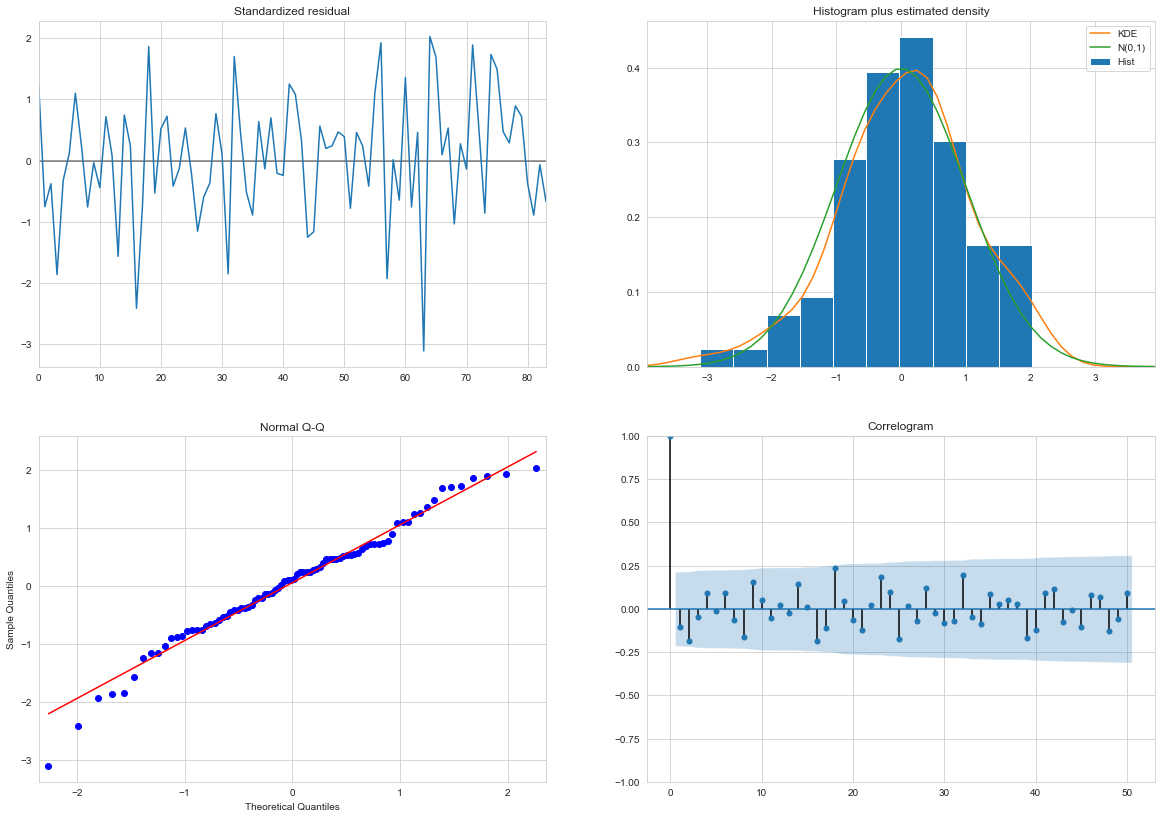

In [68]:
plot_diagnostics(sarima_res = results_train, figsize=(20,14), lags=50)

Ce mod√®le est bien valid√© sur notre s√©rie d'entrainement.     
**R√©alisons √† pr√©sent la pr√©diction** :

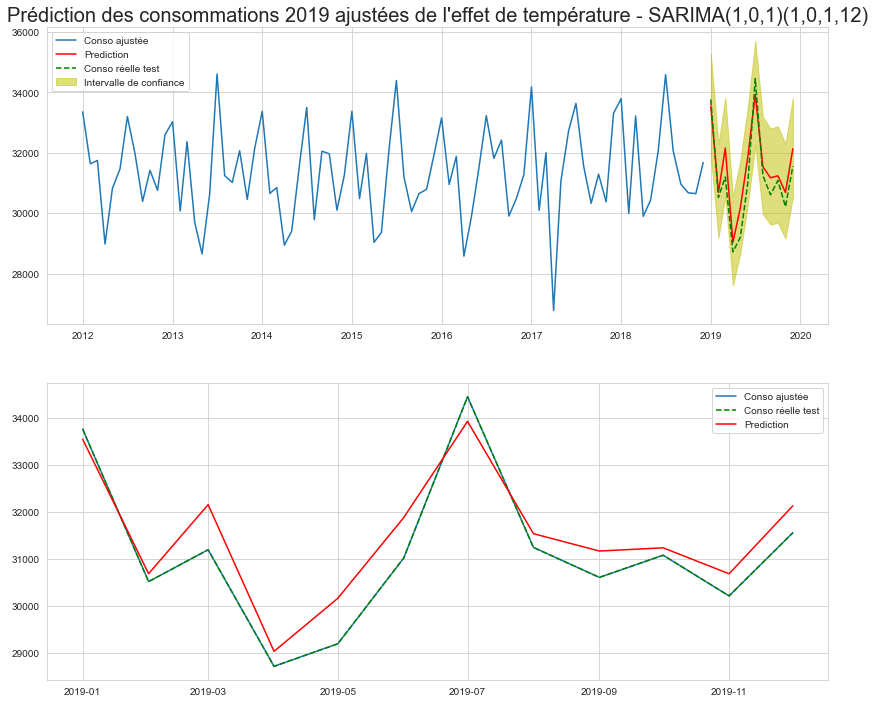

In [69]:
pred_model = results_train.get_forecast(12)
pred = pred_model.predicted_mean
#Intervals de pr√©visions √† 5%
pred_ci = pred_model.conf_int(alpha=0.05)

plt.figure(figsize=(14,12))
plt.subplot(211)
plt.plot(x_train, label='Conso ajust√©e')
plt.plot(y_test.index, np.exp(pred), color='r', label='Prediction')
plt.plot(np.exp(y_test), label='Conso r√©elle test', color="g", linestyle="--")
plt.fill_between(y_test.index, np.exp(pred_ci[:,0]), np.exp(pred_ci[:,1]), alpha=0.5, color="y", label="Intervalle de confiance")
plt.title("Pr√©diction des consommations 2019 ajust√©es de l'effet de temp√©rature - SARIMA(1,0,1)(1,0,1,12)", fontsize=20)
plt.legend()

#Zoom
plt.subplot(212)
plt.plot(x["2019":], label='Conso ajust√©e')
plt.plot(x_test, label='Conso r√©elle test', color="g", linestyle="--")
plt.plot(y_test.index, np.exp(pred), color='r', label='Prediction')
plt.legend()

plt.show()

**On calcule les m√©triques pour SARIMA** :

In [70]:
df_metrics_SARIMA = metrics_timeseries(np.exp(y_test), np.exp(pred))
df_metrics_SARIMA

M√©trique      R√©sultats
0      MAE     505.762125
1      MSE  335280.939659
2     RMSE     579.034489
3     MAPE       1.636208
4       R¬≤       0.862357

On peut √©galerment obtenir cet indicateur via les fonctions de Statsmodels :

In [71]:
sm.tools.eval_measures.rmse(np.exp(y_test), np.exp(pred))

579.0344891794548

In [72]:
df_compare_metrics = pd.merge(df_metrics_holt_winters, df_metrics_SARIMA, on="M√©trique").rename(columns={"R√©sultats_x":"R√©sultats HW","R√©sultats_y":"R√©sultats SARIMA"})
df_compare_metrics

M√©trique   R√©sultats HW  R√©sultats SARIMA
0      MAE     574.707289        505.762125
1      MSE  506040.406414     335280.939659
2     RMSE     711.365171        579.034489
3     MAPE       1.865724          1.636208
4       R¬≤       0.792255          0.862357

Si l'on regarde ces diff√©rentes m√©triques, **le mod√®le SARIMA semble √™tre meilleur que le HOLT-WINTERS** pour cette s√©rie temporelle.

## <font color="#e3a51a" style="font-family:Helvetica; font-variant: small-caps;" id="pred_fin">Pr√©vision des consommations pour l'ann√©e 2020.</font>

Mantenant que nos mod√®les Holt-Winters et SARIMA ont √©t√© test√©s, nous allons pouvoir effectuer cette pr√©diction pour 2020 *(donn√©es inconnues de l'algorithme)* :

 ### <font color="purple" style="font-family:Helvetica; font-variant: small-caps;">M√©thode de Holt-Winters</font>

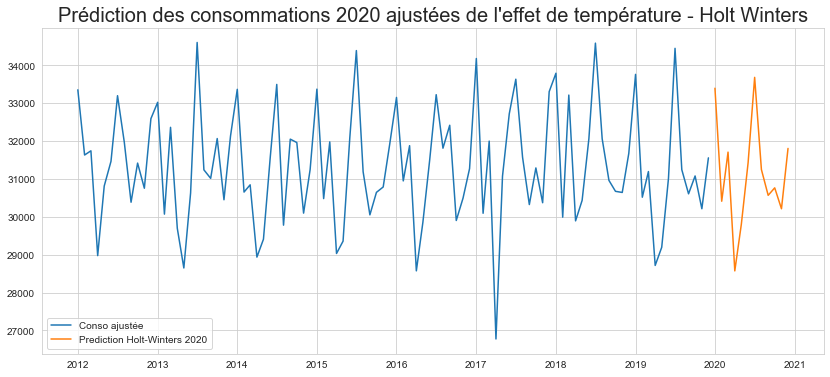

In [73]:
hw_ln_2020 = ExponentialSmoothing(np.asarray(y), seasonal_periods=12, trend='add', seasonal='add').fit()
hw_pred_ln_2020 = hw_ln_2020.forecast(12)

plt.figure(figsize=(14,6))
plt.plot(x, label='Conso ajust√©e')
plt.plot(pd.date_range(x.index[len(x)-1], periods=12, freq='M'), np.exp(hw_pred_ln_2020), label='Prediction Holt-Winters 2020')
plt.title("Pr√©diction des consommations 2020 ajust√©es de l'effet de temp√©rature - Holt Winters", fontsize=20)
plt.legend()
plt.show()

### <font color="purple" style="font-family:Helvetica; font-variant: small-caps;">M√©thode SARIMA</font>

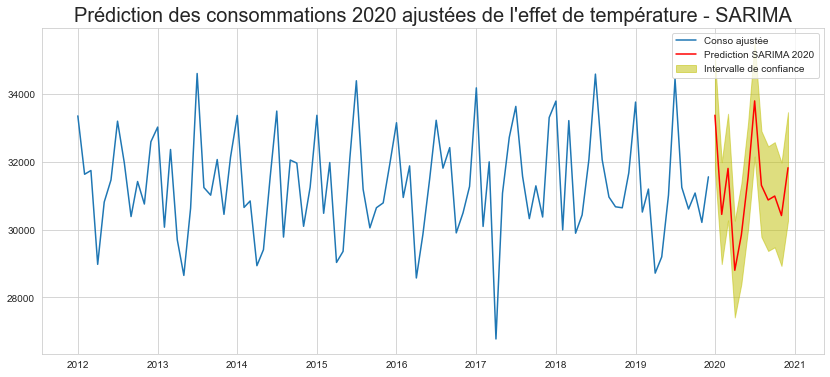

In [74]:
pred_model_2020 = results2.get_forecast(12)
pred_2020 = pred_model_2020.predicted_mean
#Intervals de pr√©visions √† 5%
pred_ci_2020 = pred_model_2020.conf_int(alpha=0.05)

plt.figure(figsize=(14,6))
plt.plot(x, label='Conso ajust√©e')
plt.plot(pd.date_range(x.index[len(x)-1], periods=12, freq='M'), np.exp(pred_2020), color='r', label='Prediction SARIMA 2020')
plt.fill_between(pd.date_range(x.index[len(x)-1], periods=12, freq='M'), np.exp(pred_ci_2020[:,0]), 
                 np.exp(pred_ci_2020[:,1]), alpha=0.5, color="y", label="Intervalle de confiance")
plt.title("Pr√©diction des consommations 2020 ajust√©es de l'effet de temp√©rature - SARIMA", fontsize=20)
plt.legend()
plt.show()

### <font color="purple" style="font-family:Helvetica; font-variant: small-caps;">Comparaison des 2 m√©thodes</font>

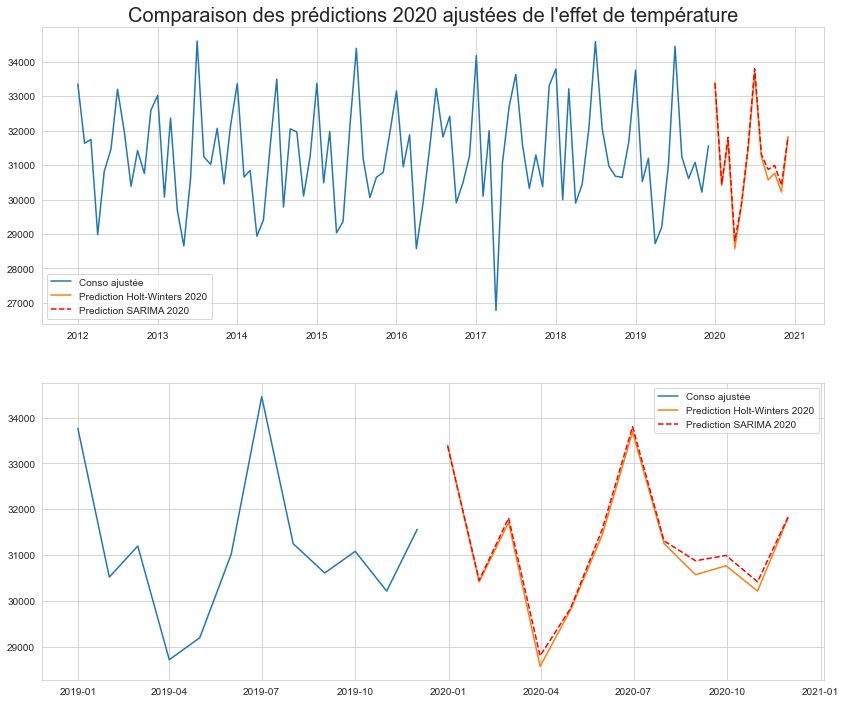

In [75]:
plt.figure(figsize=(14,12))
plt.subplot(211)
plt.plot(x, label='Conso ajust√©e')
plt.plot(pd.date_range(x.index[len(x)-1], periods=12, freq='M'), np.exp(hw_pred_ln_2020), label='Prediction Holt-Winters 2020')
plt.plot(pd.date_range(x.index[len(x)-1], periods=12, freq='M'), np.exp(pred_2020), color='r', linestyle="--", label='Prediction SARIMA 2020')
plt.title("Comparaison des pr√©dictions 2020 ajust√©es de l'effet de temp√©rature", fontsize=20)
plt.legend()

#Zoom
plt.subplot(212)
plt.plot(x["2019":], label='Conso ajust√©e')
plt.plot(pd.date_range(x.index[len(x)-1], periods=12, freq='M'), np.exp(hw_pred_ln_2020), label='Prediction Holt-Winters 2020')
plt.plot(pd.date_range(x.index[len(x)-1], periods=12, freq='M'), np.exp(pred_2020), color='r', linestyle="--", label='Prediction SARIMA 2020')
plt.legend()

plt.show()